 # **Master in Data Science - Machine Learning**

Authors: Frida Ibarra y Gema Romero

#### **Notebook 3: Feature Engineering and Variable Selection**  

This notebook focuses on **feature engineering** to enhance the predictive performance of our models. The process involves several key steps:

1. **Variable Encoding**  
We use various encoding techniques for categorical variables based on their nature and cardinality.

2. **Data Scaling**  
We apply scaling methods to normalize features, ensuring that all variables contribute equally to the learning process and preventing bias caused by differing value ranges.

3. **Dimensionality Reduction with PCA**  
To reduce redundancy and improve computational efficiency, we perform **Principal Component Analysis (PCA)**, retaining the most significant information while discarding less impactful features.

4. **Model-Based Variable Selection**  
We leverage three robust models to identify the most relevant features:

- **Random Forest**  
- **XGBoost**  
- **Lasso Regression**  

These models were used to identify the most important variables, ensuring a more accurate and efficient predictive model while reducing noise and enhancing interpretability.

This structured approach to feature engineering and model selection aims to build a reliable, scalable, and interpretable model for improved prediction accuracy.

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import warnings
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Insert Functions

In [2]:
sys.path.append('../src')  # Asegurtarse de que ../src es la carpeta donde está Funciones_Ayuda.py
import functions_src as fa  # Ahora debería importarse correctamente
sys.path.remove('../src')

#Seed
seed = 25

#### Dataset

In [3]:
#paths
path_data = '../data/application_data.csv'
path_data_train = '../data/Processing_data/df_loans_train.csv'
path_data_test = '../data/Processing_data/df_loans_test.csv'

#insert data
df_loans = pd.read_csv(path_data)
df_loans_train = pd.read_csv(path_data_train)
df_loans_test = pd.read_csv(path_data_test)

df_loans_train.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,84056,197497,Cash loans,F,N,N,1,85500.0,862560.0,25348.5,720000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.002134,-11809,-3745,-1335.0,-2426,9.0,1,1,0,1,0,0,Medicine staff,3.0,3,3,WEDNESDAY,8,0,0,0,1,1,1,Medicine,0.110762,0.076364,0.380800,0.0876,0.0762,0.9816,0.7552,0.02105,0.0,0.1379,0.1667,0.2083,0.0482,0.0756,0.0745,0.0,0.0036,0.0840,0.0745,0.9816,0.7648,0.0190,0.0,0.1379,0.1667,0.2083,0.0459,0.0771,0.0731,0.0,0.0011,0.0869,0.0758,0.9816,0.7585,0.0208,0.0,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0,0.0031,missing,missing,0.0687,missing,missing,4.0,1.0,4.0,1.0,-707.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0,0
1,195841,327085,Cash loans,M,Y,Y,0,180000.0,1006920.0,42790.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.003122,-13873,-3460,-2734.0,-5159,14.0,1,1,0,1,0,0,missing,2.0,3,3,WEDNESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.270259,0.474984,0.700184,0.0876,0.0762,0.9816,0.7552,0.02105,0.0,0.1379,0.1667,0.2083,0.0482,0.0756,0.0745,0.0,0.0036,0.0840,0.0745,0.9816,0.7648,0.0190,0.0,0.1379,0.1667,0.2083,0.0459,0.0771,0.0731,0.0,0.0011,0.0869,0.0758,0.9816,0.7585,0.0208,0.0,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0,0.0031,missing,missing,0.0687,missing,missing,0.0,0.0,0.0,0.0,-1425.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,79945,192672,Cash loans,M,N,Y,0,180000.0,238896.0,13842.0,189000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-16489,-8675,-7422.0,-37,9.0,1,1,0,1,0,0,missing,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Industry: type 5,0.505274,0.737165,0.621226,0.0124,0.0169,0.9682,0.5648,0.00740,0.0,0.0690,0.0417,0.0417,0.0201,0.0101,0.0097,0.0,0.0000,0.0126,0.0175,0.9682,0.5818,0.

In [4]:
# Drop the first columns as it is duplicated
df_loans_train = df_loans_train.drop('Unnamed: 0',axis=1)
df_loans_test = df_loans_test.drop('Unnamed: 0',axis=1)

In [5]:
# Data dictionary
var_description = pd.read_excel('../data/columns_description.xlsx')

#### **Verify the nulls of the dataframes**

In [6]:
print(df_loans_train.isna().sum())  # Verify how many NaN are in each column of the train dataframe
print(df_loans_test.isna().sum())   # Verify how many NaN are in each column of the test dataframe

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

## **Feature Engineering**

In [7]:
# Call the function and save the results in variables
col_bool, col_cat, col_num = fa.categorize_columns(df_loans_train)

In [8]:
df_loans_train.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [9]:
cat_vars = df_loans_train.select_dtypes(include=['object']).columns

# Count unique values in each categorical variable
unique_counts = df_loans_train[cat_vars].nunique().sort_values(ascending=False)

print(unique_counts)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               19
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                8
WALLSMATERIAL_MODE             8
WEEKDAY_APPR_PROCESS_START     7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             5
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
CODE_GENDER                    3
EMERGENCYSTATE_MODE            3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_CONTRACT_TYPE             2
dtype: int64


### **Variable Encoding**

In this section, we will address the encoding of categorical variables using different techniques, depending on the nature and cardinality of the variables:

- **One-Hot Encoding**: This will be applied to variables with fewer than 8 categories that do not have a logical order, as this method prevents the model from assuming non-existent hierarchical relationships between the categories.

- **Ordinal Encoding**: This will be used for the variables NAME_EDUCATION_TYPE and WEEKDAY_APPR_PROCESS_START, which have a logical order in their categories, allowing their hierarchy to be properly represented.

- **Mean Encoding**: This will be applied to the OCCUPATION_TYPE variable (18 categories), as it efficiently captures the average relationship between each category and the target variable.

- **CatBoost Encoding**: This will be used for high cardinality variables, such as ORGANIZATION_TYPE (58 categories), to handle their complexity while minimizing the risk of overfitting.

These procedures will be consistently applied to both the training and test sets, ensuring compatible structures in both datasets. This approach allows for the efficient transformation of categorical variables, improving the models' ability to interpret the information and maximizing their performance.

#### **1- ORDINAL ENCODING**

It has been identified that some columns are appropriately scaled for ordinal encoding. These columns are **`"NAME_EDUCATION_TYPE"`** and **`"WEEKDAY_APPR_PROCESS_START"`**.

In [10]:
# NAME_EDUCATION_TYPE ------------------------------------------------------------------------------

# Desired order (from lowest to highest education level)
categories_order = [['Lower secondary', 
                     'Secondary / secondary special', 
                     'Incomplete higher', 
                     'Higher education', 
                     'Academic degree']]

# Create the OrdinalEncoder and fit it only on the training data
encoder = OrdinalEncoder(categories=categories_order)
df_loans_train['NAME_EDUCATION_TYPE_ORDINAL'] = encoder.fit_transform(df_loans_train[['NAME_EDUCATION_TYPE']])

# Apply the same transformation to the test set (without fitting)
df_loans_test['NAME_EDUCATION_TYPE_ORDINAL'] = encoder.transform(df_loans_test[['NAME_EDUCATION_TYPE']])

# Explicitly convert to numeric type
df_loans_train['NAME_EDUCATION_TYPE_ORDINAL'] = df_loans_train['NAME_EDUCATION_TYPE_ORDINAL'].astype(int)
df_loans_test['NAME_EDUCATION_TYPE_ORDINAL'] = df_loans_test['NAME_EDUCATION_TYPE_ORDINAL'].astype(int)

# WEEKDAY_APPR_PROCESS_START ------------------------------------------------------------------------------

# Desired order for the days of the week (Monday = 0, Sunday = 6)
categories_order = [['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']]

# Create the OrdinalEncoder and fit it only on the training data
encoder = OrdinalEncoder(categories=categories_order)
df_loans_train['WEEKDAY_APPR_PROCESS_START_ORDINAL'] = encoder.fit_transform(df_loans_train[['WEEKDAY_APPR_PROCESS_START']])

# Apply the same transformation to the test set (without fitting)
df_loans_test['WEEKDAY_APPR_PROCESS_START_ORDINAL'] = encoder.transform(df_loans_test[['WEEKDAY_APPR_PROCESS_START']])

# Explicitly convert to numeric type
df_loans_train['WEEKDAY_APPR_PROCESS_START_ORDINAL'] = df_loans_train['WEEKDAY_APPR_PROCESS_START_ORDINAL'].astype(int)
df_loans_test['WEEKDAY_APPR_PROCESS_START_ORDINAL'] = df_loans_test['WEEKDAY_APPR_PROCESS_START_ORDINAL'].astype(int)

# Drop the original columns that have already been encoded
df_loans_train.drop(['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'], axis=1, inplace=True)
df_loans_test.drop(['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'], axis=1, inplace=True)

#### **2- ONE HOT ENCODING**

It has been decided to apply One-Hot Encoding to the remaining categorical variables that contain fewer than 8 categories.

In [11]:
# Step 1: Identify categorical columns
list_columns_cat = df_loans_train.select_dtypes(include=["object", "category"]).columns

# Step 2: Exclude specific columns
exclude_vars = ['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

# Step 3: Filter columns with 8 or fewer categories
list_columns_ohe = [
    col for col in list_columns_cat 
    if col not in exclude_vars and df_loans_train[col].nunique() <= 8
]

# Step 4: Apply One-Hot Encoding to the entire dataset (before splitting)
ohe = ce.OneHotEncoder(cols=list_columns_ohe, use_cat_names=True, handle_unknown='ignore')

# Apply One-Hot Encoding to the training and test sets
df_loans_train_HE = ohe.fit_transform(df_loans_train)  # Use fit_transform on the training set
df_loans_test_HE = ohe.transform(df_loans_test)        # Use transform on the test set

# Step 5: Align columns of df_loans_test_HE with df_loans_train_HE
df_loans_test_HE = df_loans_test_HE.reindex(columns=df_loans_train_HE.columns, fill_value=0)

# Verify that the columns are now identical
print(f"Columns in df_loans_train_HE: {df_loans_train_HE.shape}")
print(f"Columns in df_loans_test_HE: {df_loans_test_HE.shape}")

# Check for differences in columns
differences_train_vs_test = set(df_loans_train_HE.columns) - set(df_loans_test_HE.columns)
differences_test_vs_train = set(df_loans_test_HE.columns) - set(df_loans_train_HE.columns)
print(f"Differences in columns (train - test): {differences_train_vs_test}")
print(f"Differences in columns (test - train): {differences_test_vs_train}")

Columns in df_loans_train_HE: (246008, 166)
Columns in df_loans_test_HE: (61503, 166)
Differences in columns (train - test): set()
Differences in columns (test - train): set()


#### **3- MEAN ENCODING**

As mentioned earlier, the variable **`OCCUPATION_TYPE`** shows a **moderate relationship** with the target variable, **`TARGET`**. However, this relationship is not significant enough to apply a **Target Encoding** method. Therefore, the decision has been made to use **Mean Encoding** for its treatment.

In [12]:
# Create and fit Mean Encoding only on 'OCCUPATION_TYPE'
mean_enc = ce.TargetEncoder(cols=['OCCUPATION_TYPE'])

# Fit the encoder on the training set only
mean_enc.fit(df_loans_train_HE[['OCCUPATION_TYPE']], df_loans_train_HE['TARGET'])

# Apply the Mean Encoding transformation to training and test data
df_loans_train_ME = df_loans_train_HE.copy()
df_loans_test_ME = df_loans_test_HE.copy()

# Transform 'OCCUPATION_TYPE' and add it to the original DataFrame
df_loans_train_ME['OCCUPATION_TYPE_MEAN'] = mean_enc.transform(df_loans_train_HE[['OCCUPATION_TYPE']])
df_loans_test_ME['OCCUPATION_TYPE_MEAN'] = mean_enc.transform(df_loans_test_HE[['OCCUPATION_TYPE']])

# Verify the final shapes of the transformed datasets ----------------------------------------------------
print(df_loans_train_ME.shape, df_loans_test_ME.shape)

(246008, 167) (61503, 167)


#### **4- CATBOOST ENCODING**

As it was mentioned earlier, we are goin to apply **catboost encoding** for high cardinality variables, with the goal to handle their complexity while minimizing the risk of overfitting. So, it is going to be applied to **`ORGANIZATION_TYPE`**, as it has 58 categories.

In [13]:
# Define the target column for encoding
target_column = 'ORGANIZATION_TYPE'

# Create and fit the CatBoost Encoder
catboost_enc = ce.CatBoostEncoder(cols=[target_column])
catboost_enc.fit(df_loans_train_ME[target_column], df_loans_train_ME['TARGET'])  # Use the TARGET column already present

# Transform the training and test sets
df_loans_train_MEC = df_loans_train_ME.copy()
df_loans_test_MEC = df_loans_test_ME.copy()

# Apply encoding to the target column
df_loans_train_MEC[target_column] = catboost_enc.transform(df_loans_train_ME[target_column])
df_loans_test_MEC[target_column] = catboost_enc.transform(df_loans_test_ME[target_column])

# Verify the final shapes
print(df_loans_train_MEC.shape, df_loans_test_MEC.shape)

# Drop the columns that are already encoded --------------------------------------------------------

df_loans_train_MEC.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)
df_loans_test_MEC.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

# Inspect columns that are still of type object ----------------------------------------------------
object_columns = df_loans_train_MEC.select_dtypes(include=["object"]).columns
print("Columns of type object:", object_columns) 

(246008, 167) (61503, 167)
Columns of type object: Index([], dtype='object')


After encoding the categorical variables, the following datasets remain:

- A training dataset with 167 columns and 246,008 instances
- A test dataset with 167 columns and 61,503 instances

#### **SEPARATE TRAIN AND TEST**

In [14]:
#train
y_train = df_loans_train_MEC['TARGET']
X_train = df_loans_train_MEC.drop('TARGET', axis=1)

#test
y_test = df_loans_test_MEC['TARGET']
X_test = df_loans_test_MEC.drop('TARGET', axis=1)

#shape train and test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246008, 165), (246008,), (61503, 165), (61503,))

#### **SCALING OF CATEGORICAL VARIABLES**

In this section, we will focus on scaling the categorical variables after encoding. The **One-Hot** encoding transforms categorical variables into a set of binary variables with values 0 and 1, eliminating any implicit notion of order or hierarchy. This improves compatibility with machine learning algorithms, allowing categorical information to be more effectively utilized to optimize predictions.

The goal of scaling is to ensure that the encoded variables are on comparable scales, which can improve the performance of certain machine learning models. It is important to note that the **TARGET** variable will **not be scaled**, as this is a classification problem. However, if the problem were regression instead of classification, the target variable should be scaled.


In [15]:
# Verify that all variables are encoded
df_loans_train_MEC.dtypes.to_dict()

{'SK_ID_CURR': dtype('int64'),
 'NAME_CONTRACT_TYPE_Cash loans': dtype('int64'),
 'NAME_CONTRACT_TYPE_Revolving loans': dtype('int64'),
 'CODE_GENDER_F': dtype('int64'),
 'CODE_GENDER_M': dtype('int64'),
 'CODE_GENDER_XNA': dtype('int64'),
 'FLAG_OWN_CAR_N': dtype('int64'),
 'FLAG_OWN_CAR_Y': dtype('int64'),
 'FLAG_OWN_REALTY_N': dtype('int64'),
 'FLAG_OWN_REALTY_Y': dtype('int64'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE_Unaccompanied': dtype('int64'),
 'NAME_TYPE_SUITE_Family': dtype('int64'),
 'NAME_TYPE_SUITE_Spouse, partner': dtype('int64'),
 'NAME_TYPE_SUITE_missing': dtype('int64'),
 'NAME_TYPE_SUITE_Children': dtype('int64'),
 'NAME_TYPE_SUITE_Other_A': dtype('int64'),
 'NAME_TYPE_SUITE_Other_B': dtype('int64'),
 'NAME_TYPE_SUITE_Group of people': dtype('int64'),
 'NAME_INCOME_TYPE_Working': dtype('int64'),
 'NAME_INCOME_TYPE

In [16]:
# Scaling of the variables of X_train and X_test 
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [17]:
X_train_scaled.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_missing,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE_missing,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,HOUSETYPE_MODE_missing,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_specific housing,TOTALAREA_MODE,WALLSMATERIAL_MODE_missing,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Mixed,EMERGENCYSTATE_MODE_missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_EDUCATION_TYPE_ORDINAL,WEEKDAY_APPR_PROCESS_START_ORDINAL,OCCUPATION_TYPE_MEAN
0,-0.786989,0.324103,-0.324103,0.722057,-0.722031,-0.004032,0.716969,-0.716969,1.503079,-1.503079,0.807356,-0.320471,0.654397,-0.120991,0.491406,0.487182,-0.387527,-0.195664,-0.065189,-0.103933,-0.053112,-0.076114,-0.029781,0.967741,-0.468370,-0.550989,-0.275698,-0.004508,-0.006049,-0.008313,-0.00727,0.752689,-0.327059,-0.235098,-0.262467,-0.417105,0.356817,-0.194440,-0.225169,-0.127727,-0.093034,-0.060291,-1.35

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Dimensionality Reduction Techniques**

Dimensionality reduction is the process of reducing the number of input variables in a dataset, which can help improve the performance of machine learning models by eliminating noise, speeding up computation, and reducing the risk of overfitting.

#### **1- PCA**

Since the dataset is related to predicting loan approvals, PCA is particularly useful for identifying hidden patterns among features that may influence the decision. By reducing dimensionality, redundancy and noise in the data can be eliminated, making it easier to identify critical variables for assessing credit risk. Additionally, by optimizing the processing of the 167 columns, computational efficiency will be improved, which is essential in practical applications where response times and accuracy are crucial for quick and reliable decision-making.


Explained variance for 2 components: 0.15700
Explained variance for 3 components: 0.19391
Explained variance for 4 components: 0.22288
Explained variance for 5 components: 0.24427
Explained variance for 6 components: 0.26318
Explained variance for 7 components: 0.28167
Explained variance for 8 components: 0.29922
Explained variance for 9 components: 0.31641
Explained variance for 10 components: 0.33209
Explained variance for 11 components: 0.34751
Explained variance for 12 components: 0.36265
Explained variance for 13 components: 0.37642
Explained variance for 14 components: 0.38981
Explained variance for 15 components: 0.40291


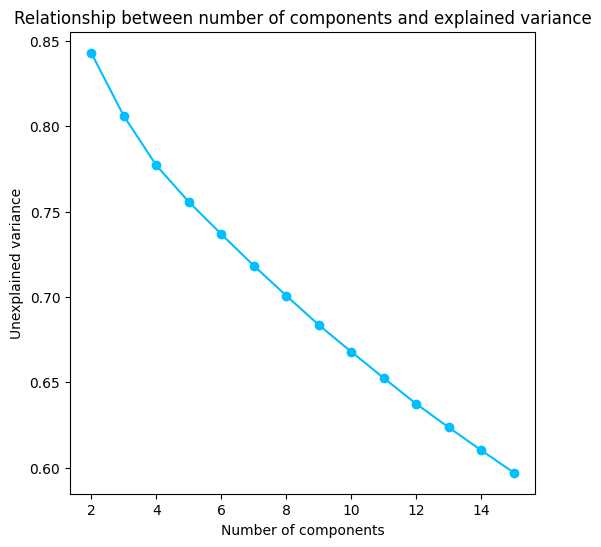

In [18]:
ve_list = []  # List to store explained variance
vne_list = []  # List to store unexplained variance
n_comp = range(2, 16)  # Range of components to test

for n in n_comp:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled.reset_index(drop=True))
    ve = pca.explained_variance_ratio_.sum()  # Explained variance
    ve_list.append(ve)
    vne = 1 - ve  # Unexplained variance
    vne_list.append(vne)
    print(f'Explained variance for {n} components: {ve:.5f}')

# Plotting the relationship between the number of components and unexplained variance
plt.figure(figsize=(6, 6))
plt.plot(n_comp, vne_list, '-o', color='deepskyblue')
plt.xlabel('Number of components')
plt.ylabel('Unexplained variance')
plt.title("Relationship between number of components and explained variance")
plt.show()

To evaluate the usefulness of PCA in dimensionality reduction, we generated a plot showing the **cumulative explained variance** as a function of the number of principal components, considering up to 15 components.

- With **2 components**, **15.70% of the variance** is explained.  
- With **3 components**, the percentage increases to **19.39%** (an increment of only **3.69 points**).  

Starting from the **fourth component onward**, the increase in explained variance for each new component becomes even smaller. This suggests that, although the first three or four components capture a significant portion of the information, the additional benefit of including more components is limited.  

Therefore, this observation supports the idea that a **reduced number of principal components** (for example, 3-5) can be used to **balance simplicity and information retention**, depending on the specific requirements of the final model.

**Steps to Perform the Analysis:**

1. Obtain the Loadings: Extract the loadings from the PCA model for the first three principal components. 

2. Interpret the Loadings: Identify the variables with the highest absolute loadings for each component, as these are the variables most strongly associated with the component. 

3. Analyze the Relationship: Based on the loadings, determine the nature of the relationship between the variables and the principal components. For example, if a variable has a high positive loading on the first component, it indicates that as the value of this variable increases, the first component will also increase. 

4. Visualize the Results

In [19]:
# Configuring PCA with 3 principal components
pca_3c = PCA(n_components=3)
pca_3c.fit(X_train_scaled.reset_index(drop=True))  # Fit PCA on scaled training data

# Transform the original data into principal components
pca_array = pca_3c.transform(X_train_scaled)

# Get the component weights (loadings) for each variable
components = pca_3c.components_
component_labels = [f'Principal Component {i+1}' for i in range(3)]  # Custom labels for components

# Create a DataFrame to hold the loadings for each variable and component
df_pca_components = pd.DataFrame(
    components.T, 
    columns=component_labels, 
    index=X_train_scaled.columns.values
)

# Apply styling to highlight the highest loading for each variable
df_pca_components.style.apply(
    lambda x: ['background-color: lightblue' if v == max(x) else '' for v in x], 
    axis=1
)

# Identify the dominant component for each variable (the one with the highest absolute loading)
df_pca_components['Dominant Component'] = df_pca_components.abs().idxmax(axis=1)

# Display the variables associated with each principal component
variables_component_1 = df_pca_components[df_pca_components['Dominant Component'] == 'Principal Component 1'].index
variables_component_2 = df_pca_components[df_pca_components['Dominant Component'] == 'Principal Component 2'].index
variables_component_3 = df_pca_components[df_pca_components['Dominant Component'] == 'Principal Component 3'].index

# Count how many variables are associated with each component
count_component_1 = len(variables_component_1)
count_component_2 = len(variables_component_2)
count_component_3 = len(variables_component_3)

# Print the results
print(f"Variables associated with the first principal component ({count_component_1}):")
print(variables_component_1)

print(f"\nVariables associated with the second principal component ({count_component_2}):")
print(variables_component_2)

print(f"\nVariables associated with the third principal component ({count_component_3}):")
print(variables_component_3)


Variables associated with the first principal component (44):
Index(['REGION_POPULATION_RELATIVE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATER

The output shows how variables are distributed across the three principal components derived from the PCA analysis.

**First Principal Component (44 variables):**  
This component is primarily associated with features related to infrastructure and loan property characteristics, such as apartment type, basement area, the number of elevators, and common areas. It also includes some physical features of the housing, like total and non-residential areas, which are key for evaluating the value and quality of the property linked to the loan.

**Second Principal Component (41 variables):**  
This component is linked to variables reflecting marital status, housing type, record age, and various external sources of information. These variables are useful for assessing the applicant’s financial situation, as they include factors such as housing type, car age, and prior credit applications. Additionally, it includes document-related and housing registration variables, suggesting that this component captures aspects related to the applicant’s social and financial stability.

**Third Principal Component (80 variables):**  
This component covers a broader range of variables, including information about the applicant such as contract type, gender, family, housing, income, and marital status. It also incorporates data on social and financial behavior, such as prior credit applications and the applicant's number of dependents. This component likely captures a wide array of factors related to the applicant’s economic situation, family, and income, providing a comprehensive overview of their financial profile.

The distribution of variables across the three components indicates that the PCA analysis has successfully reduced the dimensionality of the dataset while preserving most of the original variance. This is particularly useful for predicting whether to grant a loan, as the most relevant variables are grouped into a reduced number of components, enabling an efficient and meaningful representation of the data for decision-making.

**Now, visualize the results:**

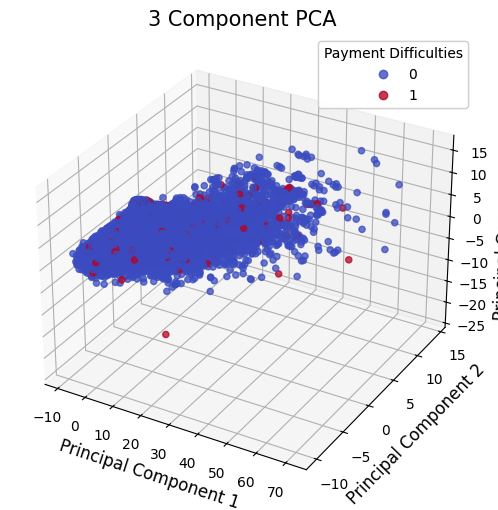

In [20]:
# Assuming you already have pca_array (the components) and the pcaDf DataFrame containing the first 3 columns PC1, PC2, and PC3
pcaDf = pd.DataFrame(pca_array, columns=['PC 1', 'PC 2', 'PC 3'])

# Add the target variable to the DataFrame
pcaDf['TARGET'] = y_train  

# Create a 3D plot
fig = plt.figure(figsize=(6, 15))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(pcaDf['PC 1'], pcaDf['PC 2'], pcaDf['PC 3'], c=pcaDf['TARGET'], cmap='coolwarm', alpha=0.75)

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3 Component PCA', fontsize=15)

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Payment Difficulties")
ax.add_artist(legend1)

# Display the plot
plt.show()

The plot shows a three-dimensional representation of the data projected onto the first three principal components from a PCA analysis, with points labeled according to the target variable of default (TARGET), where:

- **Blue points** represent class 0 (clients without payment difficulties).
- **Red points** represent class 1 (clients with payment difficulties).

Upon examining the plot, it is noticeable that most of the data points are clustered in one region, while the red points (with payment difficulties) appear to be scattered in a less dense region. This may indicate that the clients with payment difficulties observations are somewhat distinguishable from the clients without payment difficulties, but the separation is not entirely clear. This suggests that the distinction between the two classes might not be so apparent in the reduced space of the principal components.

The plot also indicates that the majority of the data's variance is concentrated in the first component, as the points are strongly grouped in the direction of the **Principal Component 1**.

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Model-Based Variable Selection** 

In [21]:
# Combine the train and test data
X_full = pd.concat([X_train_scaled, X_test_scaled], axis=0, ignore_index=True)
y_full = pd.concat([y_train, y_test], axis=0, ignore_index=True)

print(f"Dimensiones de X_full: {X_full.shape}")
print(f"Dimensiones de y_full: {y_full.shape}")

Dimensiones de X_full: (307511, 165)
Dimensiones de y_full: (307511,)


#### **1. Random Forest**

Random Forest is a key tool for feature selection, as it measures the importance of each feature based on its contribution to the reduction of impurity in the nodes of the trees. This approach allows for the robust identification of the most relevant variables for predicting loan repayment. Additionally, by applying Random Forest to the complete dataset (without separating it into training and testing sets), all available information is leveraged, leading to a more accurate assessment of each variable's relevance. This analysis is essential for reducing the dimensionality of the problem and optimizing the performance of subsequent predictive models.

Feature Importance - Random Forest:
                    Feature  Importance
66             EXT_SOURCE_2    0.052631
67             EXT_SOURCE_3    0.049276
43               DAYS_BIRTH    0.034299
46          DAYS_ID_PUBLISH    0.034124
45        DAYS_REGISTRATION    0.033224
0                SK_ID_CURR    0.032014
13              AMT_ANNUITY    0.030511
44            DAYS_EMPLOYED    0.029848
135  DAYS_LAST_PHONE_CHANGE    0.029493
12               AMT_CREDIT    0.028648


C:\Users\bris2\AppData\Local\Temp\ipykernel_23180\185117739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances.head(10), x='Importance', y='Feature', palette='viridis')


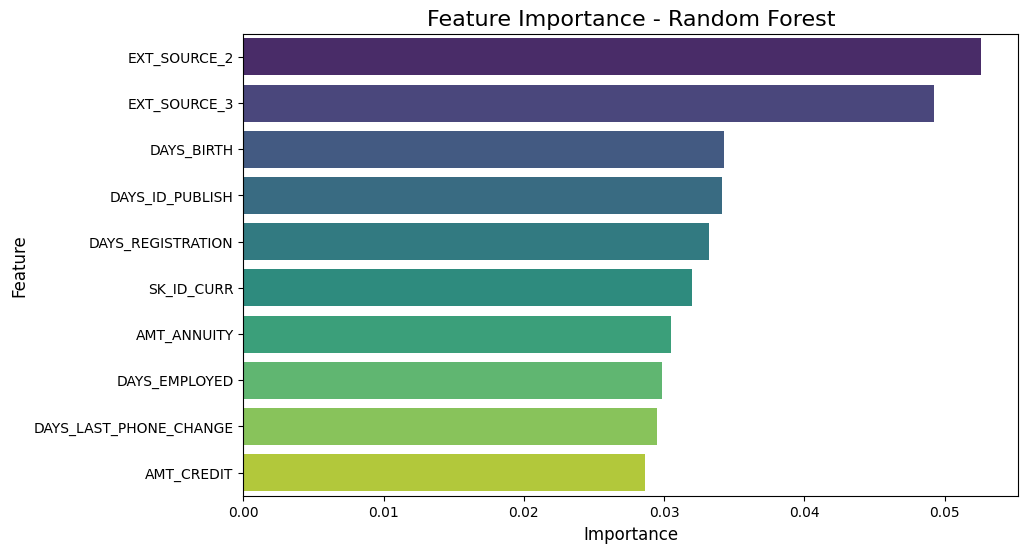

In [22]:
# Create and train the Random Forest model using only X_train and y_train
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)  # Use the seed you've defined
rf_model.fit(X_train_scaled, y_train)  # Train only on X_train and y_train

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train has column names
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Feature Importance - Random Forest:")
print(rf_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

The Random Forest results highlight the top 10 most important features influencing the prediction of loan repayment. The implications of these findings are crucial for understanding and improving the risk assessment model:

**External Risk Sources**
- Variables `EXT_SOURCE_2` and `EXT_SOURCE_3` are the most influential, indicating that external information, such as third-party credit histories, is crucial for predicting applicant behavior.
- Implication: It is advisable to integrate more external data sources to provide a more accurate and robust risk assessment.

**Applicant's Tenure and Life Changes**
- Variables such as `DAYS_BIRTH`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION`, `DAYS_LAST_PHONE_CHANGE`, and `DAYS_EMPLOYED` are associated with the applicant's age or recent changes in their life, such as age, document changes, employment, or phone updates.
- Implication: Applicants with recent instability may pose a higher risk, so it may be beneficial to thoroughly review these cases before approving a loan.

**Loan Amount and Annuity Payments**
- `AMT_CREDIT` and `AMT_ANNUITY` reflect the loan amount requested and the amount of periodic payments.
- Implication: Stricter limits could be set on the relationship between the requested loan amount and repayment capacity to mitigate the risk of default.

**Applicant Identification**
- The variable `SK_ID_CURR` appears in the list, although its importance is likely lower compared to other variables. This suggests that it does not have a direct impact on predictions but serves as a unique identifier that may be correlated with other features.
- Implication: This variable is likely used to identify unique records but does not significantly affect the model’s predictive performance.

#### **2. XGBoost**

**XGBoost (Extreme Gradient Boosting)** is a popular machine learning algorithm based on decision trees. It is an optimized implementation of gradient boosting, designed for speed and performance. XGBoost builds an ensemble of decision trees sequentially, where each tree corrects the errors made by the previous ones. It is particularly effective for classification and regression tasks and can handle both structured and unstructured data.

C:\Users\bris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importance - XGBoost:
                           Feature  Importance
4                    CODE_GENDER_M    0.045073
67                    EXT_SOURCE_3    0.037651
66                    EXT_SOURCE_2    0.033440
162    NAME_EDUCATION_TYPE_ORDINAL    0.018442
1    NAME_CONTRACT_TYPE_Cash loans    0.016516
137                FLAG_DOCUMENT_3    0.016307
65                    EXT_SOURCE_1    0.014576
56     REGION_RATING_CLIENT_W_CITY    0.014343
6                   FLAG_OWN_CAR_N    0.014095
3                    CODE_GENDER_F    0.012186


C:\Users\bris2\AppData\Local\Temp\ipykernel_23180\2316451494.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importances.head(10), x='Importance', y='Feature', palette='viridis')


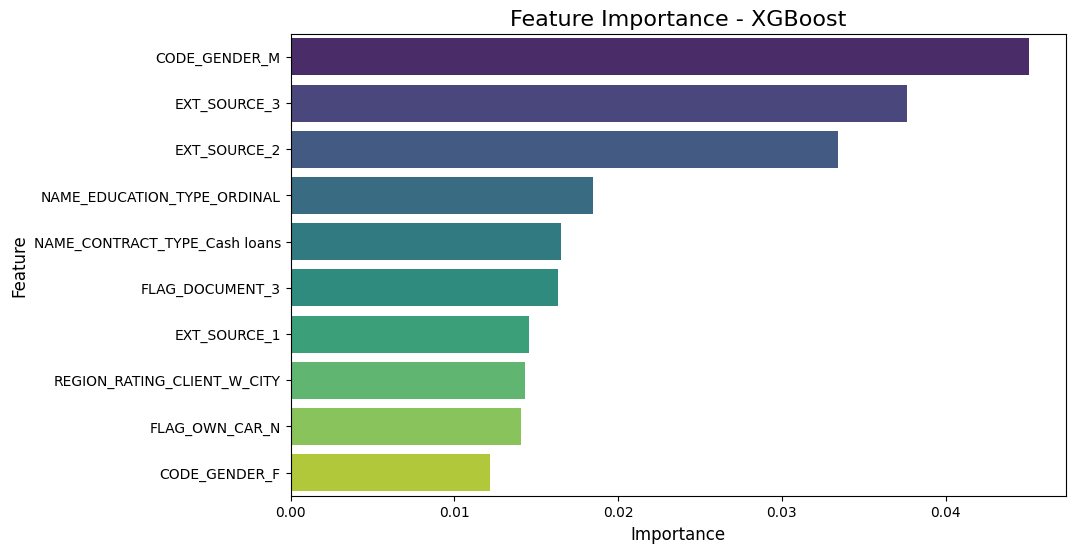

In [23]:
# Create and train the XGBoost model using only X_train_scaled and y_train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)  # Use the seed you've defined
xgb_model.fit(X_train_scaled, y_train)  # Train only on X_train_scaled and y_train

# Get feature importances
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original columns from X_train
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Feature Importance - XGBoost:")
print(xgb_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - XGBoost', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

When applying XGBoost to identify the importance of variables in predicting loan repayment, it is observed that **`CODE_GENDER_M`**, **`EXT_SOURCE_3`**, and **`EXT_SOURCE_2`** are the most relevant. Additionally, **`CODE_GENDER_F`** is also among the important variables, although it ranks last among the top features. This result highlights concerns from both an ethical and regulatory perspective. In particular, the prominence of **CODE_GENDER_M** raises potential issues of gender bias, which may be subject to scrutiny under fairness and anti-discrimination regulations. The position of **CODE_GENDER_F** among the features suggests the need for a deeper analysis to ensure that gender representation and fairness are appropriately addressed. Furthermore, there is a significant reliance on external information sources in credit risk evaluation, emphasizing the need for transparency and compliance with data protection and regulatory standards.


**The implications of these findings are as follows:**

1. **Gender as a Predictor:**  
   The variable **`CODE_GENDER_M`** appears as the most relevant feature, which could raise concerns similar to those mentioned in the previous analysis. Using this variable in predictions may violate gender equality and human rights regulations, such as GDPR.

   **Implication:** A deeper analysis should be conducted to determine whether its relevance is indirect or if there is any inherent bias present in the data. Additionally, the variable **`CODE_GENDER_F`**, which corresponds to the female gender, should be examined for any potential similar issues. Any gender-specific features could unintentionally perpetuate stereotypes or contribute to discriminatory outcomes, especially in contexts like hiring, loan applications, or other areas governed by equality laws.
   

2. **External Information Sources:**  
   The variables **`EXT_SOURCE_3`** and **`EXT_SOURCE_2`** remain relevant, suggesting that external data is a determinant factor in risk assessment.  
   **Implication:** Continuously improving the integration of external sources could enhance the predictive capability of the model even further.

3. **Other Variables:**  
   Variables such as **`NAME_EDUCATION_TYPE_ORDINAL`**,**`NAME_CONTRACT_TYPE_Cash loans`** and **`FLAG_DOCUMENT_3`** also show some relevance. These variables could indicate the applicant's financial situation or economic stability and may contribute to predicting repayment likelihood.  
   
   **Implication:** It is crucial to continue monitoring and evaluating the impact of these variables on the model, as their influence could be key in improving prediction accuracy. 
   
   **Note** Although the **`FLAG_DOCUMENT_3`** has been identified as a relevant feature, variables related to documents may not be entirely reliable since many of them have not been submitted. Therefore, its relevance could stem from the fact that it is one of the few documents that was actually provided, but this does not necessarily imply it holds real significance. As a result, consideration should be given to removing it if it is determined that its inclusion could hinder the analysis.

**Proposed Actions to Address Equity and Regulatory Compliance Issues**

1. **SHAP Analysis:**  
   Conduct an analysis using the SHAP tool to understand the real impact of the **`CODE_GENDER_M`** variable and others on predictions. This would help verify whether their relevance is due to indirect correlations with other variables.

2. **Review of Sensitive Variables:**  
   Consider removing **`CODE_GENDER_M`** and other sensitive variables during the model's production phase to mitigate any risk of discrimination. Ensure that decisions are made solely based on non-protected features that comply with legal requirements.

### **3. Lasso vs Ridge**

**Lasso (L1 Regularization)** and **Ridge (L2 Regularization)** are both techniques used to prevent overfitting in regression models by adding penalties to the model’s coefficients. While both methods shrink the coefficients, Lasso offers a unique advantage by setting some coefficients exactly to zero, effectively eliminating irrelevant features. This makes Lasso a powerful tool for **feature selection**, especially in high-dimensional datasets.

In contrast, Ridge reduces the size of all coefficients but does not eliminate any, making it less effective for simplifying models with many irrelevant features. Lasso’s ability to select only the most important variables not only improves model performance by reducing overfitting but also makes the model more interpretable. Therefore, Lasso is often the preferred choice when dealing with a large number of features and the need to identify the most significant ones.

#### **Lasso (Least Absolute Shrinkage and Selection Operator)**

*The data has to be scaled*

We chose to use the Lasso model with **logistic regression** instead of linear regression because our dataset's target variable is categorical, and the goal is classification rather than predicting continuous values. Logistic regression is specifically designed for classification tasks, as it predicts probabilities between 0 and 1, which are ideal for assigning data to categories (e.g., `0` or `1`). In contrast, linear regression generates continuous predictions that can fall outside this range, making it unsuitable for classification.

Additionally, logistic regression offers better interpretability for categorical outcomes. Its coefficients represent changes in the log-odds of the target variable, providing meaningful insights into the relationships between predictors and the likelihood of a particular class. This makes logistic regression the more appropriate choice for classification problems.


**Train a Lasso Logistic Regression Model and Select Features**

Selected features by Lasso (Logistic Regression):
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       ...
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_EDUCATION_TYPE_ORDINAL',
       'WEEKDAY_APPR_PROCESS_START_ORDINAL', 'OCCUPATION_TYPE_MEAN'],
      dtype='object', length=163)

Dropped features by Lasso (Logistic Regression):
['APARTMENTS_MEDI' 'FLOORSMIN_MEDI']


C:\Users\bris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bris2\AppData\Local\Temp\ipykernel_23180\3520895920.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lasso_importances.head(10), x='Coefficient', y='Feature', palette='viridis')


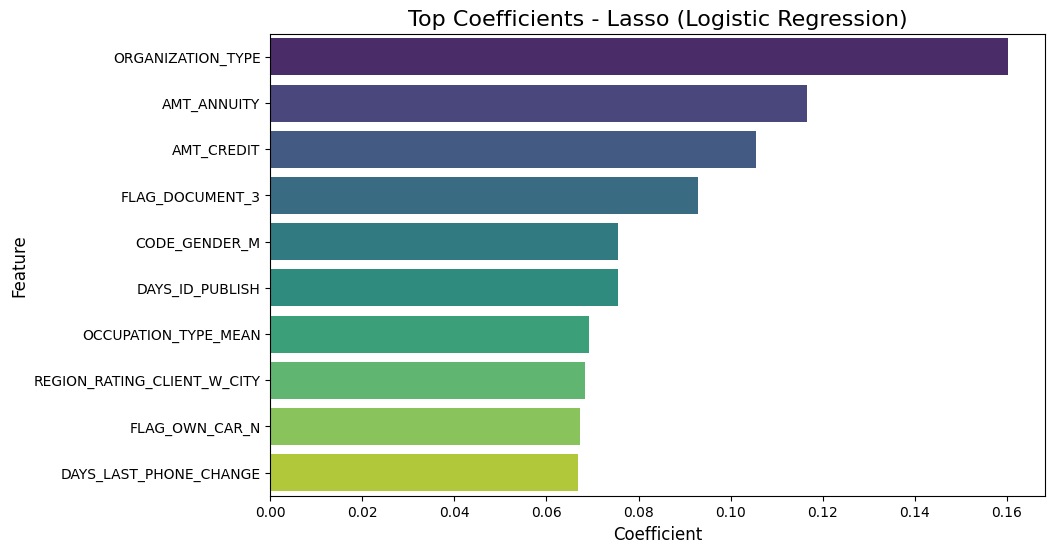

In [24]:
# Ensure X_train_scaled retains column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # Use the same columns as X_train

# Lasso model with logistic regression
lasso_logistic = LogisticRegression(
    penalty='l1',  # L1 regularization (Lasso)
    solver='saga',  # Solver compatible with L1
    C=1.0,  # Inverse of regularization strength: adjust as needed
    random_state=seed
)

# Train the model only with X_train_scaled and y_train
lasso_logistic.fit(X_train_scaled, y_train)

# Select features based on Lasso coefficients
sel_lasso = SelectFromModel(lasso_logistic, prefit=True, threshold=1e-4)  # Adjust the threshold if necessary
selected_features = X_train.columns[sel_lasso.get_support()]  # Selected features
removed_features = X_train.columns[~sel_lasso.get_support()]  # Dropped features

# Display selected and removed features
print("Selected features by Lasso (Logistic Regression):")
print(selected_features)
print("\nDropped features by Lasso (Logistic Regression):")
print(removed_features.values)

# Model coefficients
lasso_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_logistic.coef_.flatten()
}).sort_values(by='Coefficient', ascending=False)

# Visualize the most important coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_importances.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.title('Top Coefficients - Lasso (Logistic Regression)', fontsize=16)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


**Sort and Visualize Lasso Coefficients**

C:\Users\bris2\AppData\Local\Temp\ipykernel_23180\2170910842.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


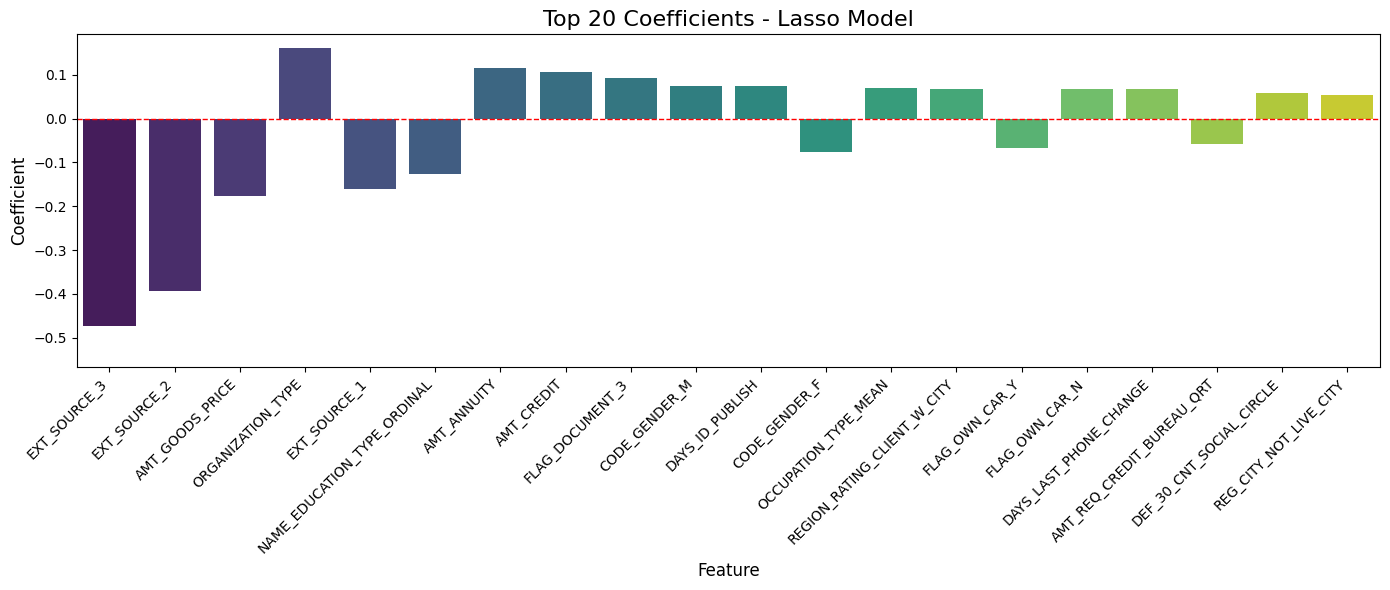

In [25]:
# Create a column with the absolute value of coefficients to sort them
lasso_importances['abs_coef'] = lasso_importances['Coefficient'].abs()

# Sort by the absolute coefficient value (to show the most relevant features)
lasso_importances = lasso_importances.sort_values(by='abs_coef', ascending=False)

# Visualize coefficients with vertical bars (coefficients on Y-axis and features on X-axis)
plt.figure(figsize=(14, 6))  # Adjust size for better visibility

# Create the vertical bar plot
sns.barplot(
    x="Feature",  # Features (on the X-axis)
    y="Coefficient",  # Coefficients (on the Y-axis)
    data=lasso_importances.head(20),  # Display the top 20 most important features
    palette="viridis"
)

# Add a line at 0 to highlight negative coefficients
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Set Y-axis limits to provide more space for the coefficients
y_max = lasso_importances['Coefficient'].max()  # Use the highest coefficient value
y_min = lasso_importances['Coefficient'].min()  # Use the lowest coefficient value

# Set Y-axis limits to make the range more spacious
plt.ylim(y_min * 1.2, y_max * 1.2)  # Multiply by 1.2 to widen the range

# Add titles and labels
plt.title('Top 20 Coefficients - Lasso Model', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Use tight_layout to make sure labels are well displayed
plt.tight_layout()

# Show the plot
plt.show()

**Crossover of results**

Now we will consolidate and normalize feature importances from the RandomForest, XGBoost, and Lasso models into a single DataFrame, ensuring that they are scaled to a uniform range between 0 and 1, making it easier to compare the relative importance of each feature across different models.

In [26]:
# Create a DataFrame with feature importances from different models
summary = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train for features
    'RandomForest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_,
    'Lasso': np.abs(lasso_logistic.coef_.flatten())  # Use the absolute value of Lasso coefficients
})

# Normalize the importance columns to scale the values between 0 and 1
summary[['RandomForest', 'XGBoost', 'Lasso']] = summary[['RandomForest', 'XGBoost', 'Lasso']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Sort by all columns in descending order
summary_sorted = summary.sort_values(by=['RandomForest', 'XGBoost', 'Lasso'], ascending=False)

# Display the sorted DataFrame
summary_sorted


,Feature,RandomForest,XGBoost,Lasso
66,EXT_SOURCE_2,1.000000,0.741901,0.831102
67,EXT_SOURCE_3,0.936255,0.835333,1.000000
43,DAYS_BIRTH,0.651689,0.187900,0.024930
46,DAYS_ID_PUBLISH,0.648366,0.140817,0.159748
45,DAYS_REGISTRATION,0.631265,0.127482,0.099704
0,SK_ID_CURR,0.608277,0.120297,0.002399
13,AMT_ANNUITY,0.579714,0.190862,0.246799
44,DAYS_EMPLOYED,0.567114,0.174652,0.070480
135,DAYS_LAST_PHONE_CHANGE,0.560371,0.145255,0.141554
12,AMT_CREDIT,0.544318,0.200950,0.223460


**Final Candidate Features to Remove**

*This is where the scaled data is combined, unnecessary columns are removed, and the final dataset is exported.*

In [27]:
# Ensure that the variables y_train and y_test are named 'TARGET'
y_train = y_train.rename('TARGET')
y_test = y_test.rename('TARGET')

In [28]:
# Variables to be removed  
variables_to_remove = [
    # Document-related variables  
    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7',

    # Customer feature-related variables  
    'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Pensioner', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Other_A', 
    'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied',

    # Geographical location-related variables  
    'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 
    'REG_CITY_NOT_WORK_CITY', 'REGION_POPULATION_RELATIVE',

    # Housing-related variables  
    'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'BASEMENTAREA_AVG', 'TOTALAREA_MODE', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LANDAREA_MODE',

    # Social relationship-related variables  
    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',

    # Time and date-related variables  
    'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',

    # Wall material and housing construction variables  
    'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
    'WALLSMATERIAL_MODE_Wooden'
]

**Last Steps**

In [29]:
# Concatenate X_train_scaled with y_train and X_test_scaled with y_test  
df_loans_train_cut = pd.concat([X_train_scaled, y_train], axis=1)  
df_loans_test_cut = pd.concat([X_test_scaled, y_test], axis=1)  

# Verify the columns in both datasets  
columns_train = df_loans_train_cut.columns  
columns_test = df_loans_test_cut.columns  

# Ensure that the columns you want to remove are present in both datasets  
variables_to_remove_train = [col for col in variables_to_remove if col in columns_train]  
variables_to_remove_test = [col for col in variables_to_remove if col in columns_test]  

# Remove the columns in both datasets  
df_loans_train_cut = df_loans_train_cut.drop(columns=variables_to_remove_train)  
df_loans_test_cut = df_loans_test_cut.drop(columns=variables_to_remove_test)  

**Conclusions of Variable Selection to Optimize Model Performance**

Removing unnecessary variables is a fundamental step in machine learning, helping to optimize model performance, reduce complexity, and prevent overfitting. In this analysis, the variables selected for removal were determined through a comprehensive evaluation of their predictive contributions, assessed using Lasso model coefficients, feature importance in Random Forest and XGBoost, and the exploration of correlations with the target variable.

**1. Low or Null Predictive Relevance** 

A set of variables with low or no relevance for prediction was identified. These variables showed coefficients close to zero in the Lasso model and low feature importance in Random Forest and XGBoost. Examples include:
- `FLAG_DOCUMENT_12`
- `NAME_INCOME_TYPE_Businessman`
- `NAME_TYPE_SUITE_Group of people`
- `FLAG_CONT_MOBILE`

These variables do not provide significant predictive value and, therefore, are candidates for removal.

**2. Redundant Information**

Another important criterion was the redundancy of information. This refers to variables that, while having some standalone predictive value, are highly correlated with other features. A clear example includes:

- `AMT_REQ_CREDIT_BUREAU_`
- `DAYS_` variables

These variables show a strong relationship with each other and other dataset features. Due to this redundancy, removing them helps to simplify the model and improve interpretability.

**3. Variable Variability**

Some variables, such as `EXT_SOURCE_3` and `EXT_SOURCE_2`, demonstrated high importance across all models (Random Forest, XGBoost, and Lasso). This indicates that they are crucial for predicting the target variable and, therefore, should not be removed.

**4. High Importance and Variability**

Variables like:

- `SK_ID_CURR`
- `AMT_GOODS_PRICE`
- `DAYS_BIRTH`

show high importance and variability. These features contribute significantly to the accuracy of predictions and should be retained to ensure the model’s performance.

**5. Interpretability and Model Efficiency**

Removing irrelevant, redundant, or low-variability variables helps in creating a more efficient and interpretable model. In applications like loan approvals, it is necessary to justify decisions to stakeholders transparently.

**Conclusion**

By eliminating unnecessary variables, redundant information, and low-variability features, we build a more efficient and precise model. This approach minimizes overfitting risks, enhances generalization to new data, and improves the overall interpretability and reliability of the predictions, resulting in a robust and scalable solution for loan default prediction.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **END NOTEBOOK 3**

In [30]:
df_loans_train_cut.to_csv("../data/Processing_data/df_loans_train_cut.csv")
df_loans_test_cut.to_csv("../data/Processing_data/df_loans_test_cut.csv")